# Waymo Open Motion Data Analysis

## Brief Introduction to Waymo Open Motion Dataset



In [1]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import sys

sys.path.append(".")

import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import tensorflow as tf

from waymo_open_dataset.protos import scenario_pb2

data_path = "../trajectory/waymo_open_dataset_v_1_2_0/uncompressed"
folders = [
    "training",
    "training_20s",
    "validation",
    "validation_interactive",
    "testing",
    "testing_interactive",
]
tfrecord_file_lists = []
tfrecord_file_path_lists = []
for folder in folders:
    tf_record_file_list = os.listdir(os.path.join(data_path, folder))
    print(f"Number of tfrecord files in {folder}: {len(tf_record_file_list)}")
    tfrecord_file_lists.append(os.listdir(os.path.join(data_path, folder)))
    tfrecord_file_path_lists.append(
        [os.path.join(data_path, folder, f) for f in tf_record_file_list]
    )

Number of tfrecord files in training: 1000
Number of tfrecord files in training_20s: 1000
Number of tfrecord files in validation: 150
Number of tfrecord files in validation_interactive: 150
Number of tfrecord files in testing: 150
Number of tfrecord files in testing_interactive: 150


In [2]:
dataset = tf.data.TFRecordDataset(tfrecord_file_path_lists[0][:100])
scenario_data = []
for data in dataset:
    proto_string = data.numpy()
    proto = scenario_pb2.Scenario()
    proto.ParseFromString(proto_string)
    scenario_data.append(proto)

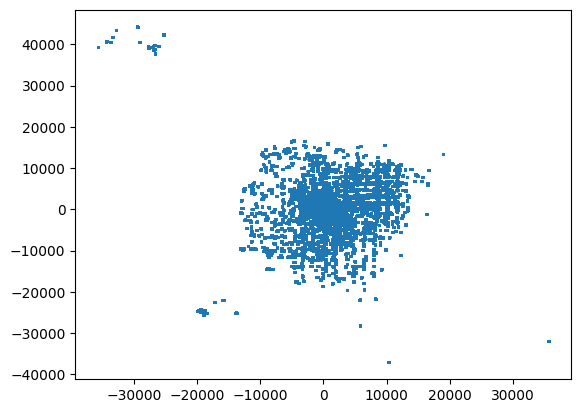

In [3]:
x = []
y = []
for data in scenario_data:
    for tracks in data.tracks:
        for state in tracks.states:
            x.append(state.center_x)
            y.append(state.center_y)

plt.scatter(x, y, s=0.01)
plt.show()